In [1]:
#import inline as inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
#%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
data = """
Brand,Type,Color,Construction_Year,Odometer,Ask Price,Days_Until_MOT,HP
Peugeot 106,1.0,blue,2002,166879,999,138,60
Peugeot 106,1.0,blue,1998,234484,999,346,60
Peugeot 106,1.1,black,1997,219752,500,-5,60
Peugeot 106,1.1,red,2001,223692,750,-87,60
Peugeot 106,1.1,grey,2002,120275,1650,356,59
Peugeot 106,1.1,red,2003,131358,1399,266,60
Peugeot 106,1.1,green,1999,304277,799,173,57
Peugeot 106,1.4,green,1998,93685,1300,0,75
Peugeot 106,1.1,white,2002,225935,950,113,60
Peugeot 106,1.4,green,1997,252319,650,133,75
Peugeot 106,1.0,black,1998,220000,700,82,50
Peugeot 106,1.1,black,1997,212000,700,75,60
Peugeot 106,1.1,black,2003,255134,799,197,60
"""

# Write this dataset to a file and read it
with open('data.csv', 'w') as output_file:
    output_file.write(data)
df = pd.read_csv('data.csv')

In [3]:
# Convert the color column to one binary column for each color
df_colors = df['Color'].str.get_dummies().add_prefix('Color: ')
# Convert the type column to one binary column for each type
df_type = df['Type'].apply(str).str.get_dummies().add_prefix('Type: ')

# Add all dummy columns
df = pd.concat([df, df_colors, df_type], axis=1)
# And drop all categorical columns
df = df.drop(['Brand', 'Type', 'Color'], axis=1)

In [4]:
df.head()

,Construction_Year,Odometer,Ask Price,Days_Until_MOT,HP,Color: black,Color: blue,Color: green,Color: grey,Color: red,Color: white,Type: 1.0,Type: 1.1,Type: 1.4
0,2002,166879,999,138,60,0,1,0,0,0,0,1,0,0
1,1998,234484,999,346,60,0,1,0,0,0,0,1,0,0
2,1997,219752,500,-5,60,1,0,0,0,0,0,0,1,0
3,2001,223692,750,-87,60,0,0,0,0,1,0,0,1,0
4,2002,120275,1650,356,59,0,0,0,1,0,0,0,1,0


In [5]:
df['Odometer Log Log'] = np.log(np.log(df['Odometer']))

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[['Construction_Year', 'Days_Until_MOT', 'Odometer Log Log']]
y = df['Ask Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100, 100), random_state=42)
y = model.fit(X_train, y_train)

C:\Users\SANDHYA RAMESH\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


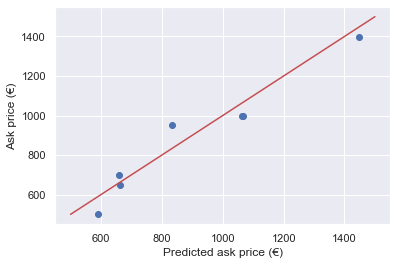

In [7]:
y_pred = model.predict(X_test)

y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted ask price (€)')
plt.ylabel('Ask price (€)')
plt.show()

In [8]:
my_car = pd.DataFrame([
    {
        'Construction_Year': 2000,
        'Odometer': 220000,
        'Days_Until_MOT': 150
    }
])

my_car['Odometer Log Log'] = np.log(np.log(my_car['Odometer']))
X_custom = my_car[['Construction_Year', 'Days_Until_MOT', 'Odometer Log Log']]
X_custom = X_normalizer.transform(X_custom)

y_pred = model.predict(X_custom)
price_prediction = y_normalizer.inverse_transform(y_pred)

In [9]:
# imports
from tkinter import *
from tkinter import messagebox as ms
import sqlite3

In [10]:
# make database and users (if not exists already) table at programme start up
with sqlite3.connect('quit.db') as db:
    c = db.cursor()

c.execute('CREATE TABLE IF NOT EXISTS user (username TEXT NOT NULL ,password TEX NOT NULL);')
db.commit()
db.close()


In [12]:
# main Class
class main:
    global p
    def __init__(self, master):
        # Window
        self.master = master
        # Some Usefull variables
        self.username = StringVar()
        self.password = StringVar()
        self.n_username = StringVar()
        self.n_password = StringVar()
        self.Construction_Year = IntVar()
        self.Odometer = IntVar()
        self.Days_Until_MOT = IntVar()
        # Create Widgets
        self.widgets()
# Login Function
    def login(self):
        # Establish Connection
        with sqlite3.connect('quit.db') as db:
            c = db.cursor()

        # Find user If there is any take proper action
        find_user = ('SELECT * FROM user WHERE username = ? and password = ?')
        c.execute(find_user, [(self.username.get()), (self.password.get())])
        result = c.fetchall()
        if result:
            self.logf.pack_forget()
            # self.head['text'] = self.username.get() + '\n Loged In'
            self.head = Label(self.master, text='Details', font=('', 35), pady=10)
            self.head.pack()
            self.detf = Frame(self.master, padx=10, pady=10)
            Label(self.detf, text='Construction_Year: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
            Entry(self.detf, textvariable=self.Construction_Year, bd=5, font=('', 15)).grid(row=0, column=1)
            Label(self.detf, text='Odometer: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
            Entry(self.detf, textvariable=self.Odometer, bd=5, font=('', 15)).grid(row=1, column=1)
            Label(self.detf, text='Days_Until_MOT: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
            Entry(self.detf, textvariable=self.Days_Until_MOT, bd=5, font=('', 15)).grid(row=2, column=1)
            Button(self.detf, text=' Submit ', bd=3, font=('', 15), padx=5, pady=5, command=self.algo).grid()
            # Button(self.detf,text = ' Create Account ',bd = 3 ,font = ('',15),padx=5,pady=5,command=self.cr).grid(row=2,column=1)
            self.detf.pack()
        else:
            ms.showerror('Oops!', 'Username Not Found.')

    def new_user(self):
        # Establish Connection
        with sqlite3.connect('quit.db') as db:
            c = db.cursor()

        # Find Existing username if any take proper action
        find_user = ('SELECT * FROM user WHERE username = ?')
        c.execute(find_user, [(self.username.get())])
        if c.fetchall():
            ms.showerror('Error!', 'Username Taken Try a Diffrent One.')
        else:
            ms.showinfo('Success!', 'Account Created!')
            self.log()
        # Create New Account
        insert = 'INSERT INTO user(username,password) VALUES(?,?)'
        c.execute(insert, [(self.n_username.get()), (self.n_password.get())])
        db.commit()

        # Frame Packing Methords

    def log(self):
        self.username.set('')
        self.password.set('')
        self.crf.pack_forget()
        self.head['text'] = 'LOGIN'
        self.logf.pack()

    def cr(self):
        self.n_username.set('')
        self.n_password.set('')
        self.logf.pack_forget()
        self.head['text'] = 'Create Account'
        self.crf.pack()
        
    def algo(self):
        a = self.Construction_Year.get()
        b = self.Odometer.get()
        d = self.Days_Until_MOT.get()
        c = y.predict([[a, b, d]])
        self.detf.pack_forget()
        
        #self.head['text'] = 'Result'
        #self.result.pack()
        Label(self.head, text='RATE : ', font=('', 20), pady=5, padx=5).grid(row=6,column=2)
        Label(self.head, text=c, font=('', 20), pady=5, padx=5).grid(row=6,column=5)
        self.head.pack()


    # Draw Widgets
    def widgets(self):
        self.head = Label(self.master, text='WELCOME', font=('', 35), pady=10)
        self.head.pack()
        self.logf = Frame(self.master, padx=10, pady=10)
        self.head = Label(self.logf, text='Login', font=('', 35), pady=10)
        Label(self.logf, text='Username: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.logf, textvariable=self.username, bd=5, font=('', 15)).grid(row=0, column=1)
        Label(self.logf, text='Password: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.logf, textvariable=self.password, bd=5, font=('', 15), show='*').grid(row=1, column=1)
        Button(self.logf, text=' Login ', bd=3, font=('', 15), padx=5, pady=5, command=self.login).grid()
        Button(self.logf, text=' Create Account ', bd=3, font=('', 15), padx=5, pady=5, command=self.cr).grid(row=2,column=1)
        self.logf.pack()

        self.crf = Frame(self.master, padx=10, pady=10)
        Label(self.crf, text='Username: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.crf, textvariable=self.n_username, bd=5, font=('', 15)).grid(row=0, column=1)
        Label(self.crf, text='Password: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.crf, textvariable=self.n_password, bd=5, font=('', 15), show='*').grid(row=1, column=1)
        Button(self.crf, text='Create Account', bd=3, font=('', 15), padx=5, pady=5, command=self.new_user).grid()
        Button(self.crf, text='Go to Login', bd=3, font=('', 15), padx=5, pady=5, command=self.log).grid(row=2,column=1)

        #self.result = Frame(self.master, padx=10, pady=10)
        #Label(self.result, text=p, font=('',20), pady=5, padx=5).grid(sticky=W)
        #self.result.pack()


# create window and application object
root = Tk()
# root.title("Login Form")
main(root)
root.mainloop()

    
